Devoir proba stats

Phase 1 : Analyse statistique descriptive et inférence

a) 
- Histogramme et diagramme de Tukey

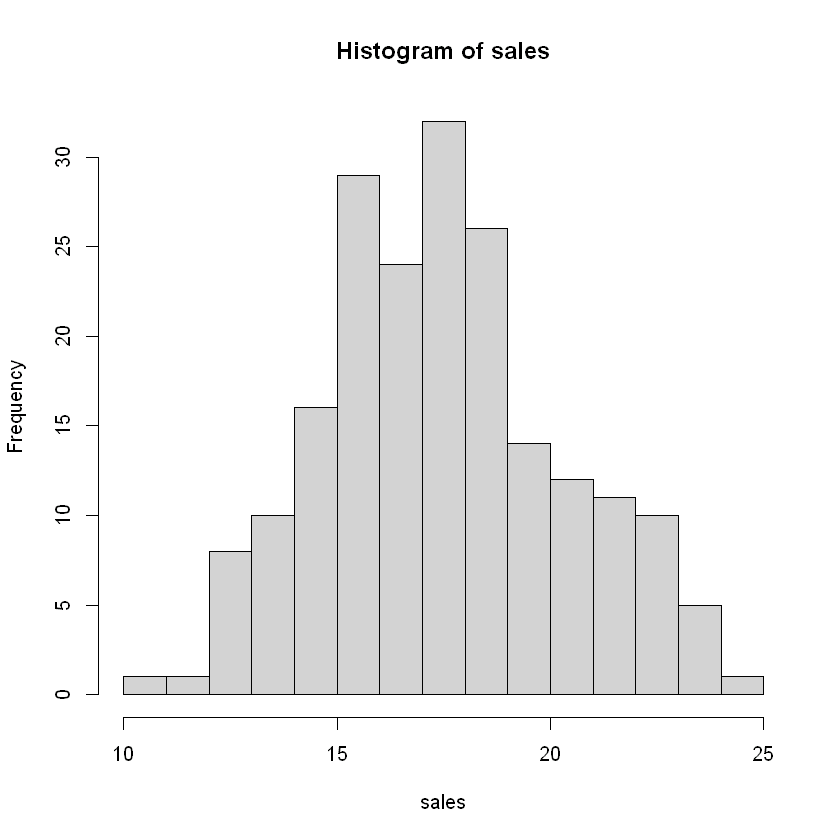

In [1]:
charger <- function(matricule) {
  set.seed(matricule)
  mondata <- read.csv2("DevoirD_A24.csv")[sample(288,200),]
}

data <- charger(2247399)


sales <- data[, 1]
hist(sales, xlim=c(10, 25), breaks = c(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25))

L'histogramme ci-dessus a 14 intervalles de largeur de 1 chaque. Cet histogramme représente le nombre de ventes en termes de milliers et le nombre de fois que ce nombre a été dans un certain intervalle. Par exemple, pour l'intervalle [15,16], il y a presque 30 résultats dans cet intervalle.

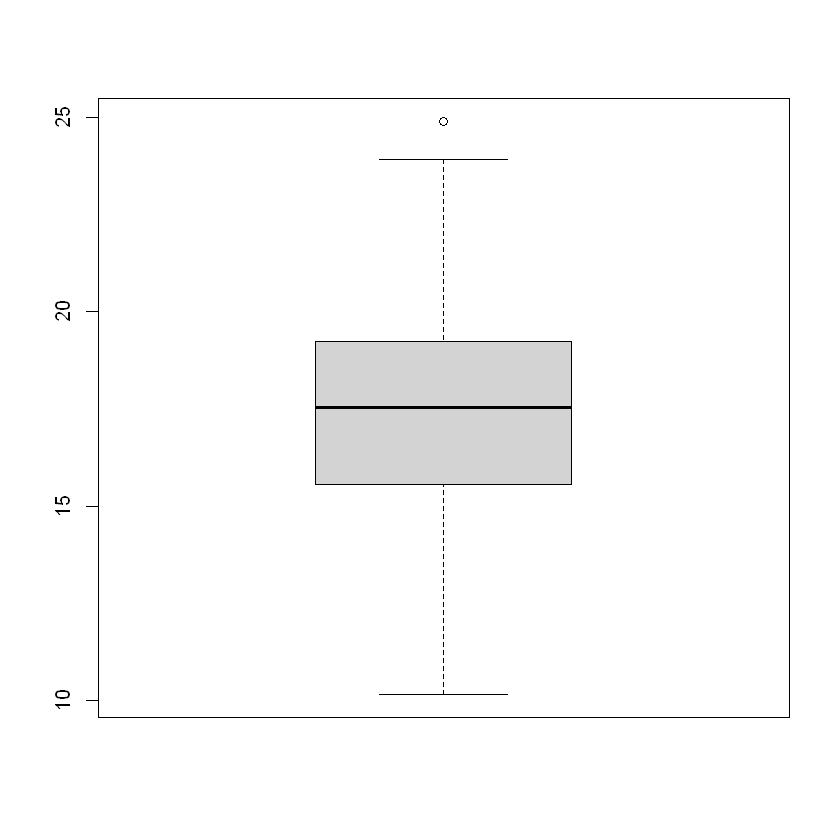

In [15]:
boxplot(sales)

Dans le boxplot ci-dessus, le centre de la boîte est Q2 (le quartile à 50%), l'extrémité d'en haut de la bôite est Q3 (75%) et le bas de la boîte est Q1(25%). Q2 est aussi la médiane pour les ventes, donc, nous avons 50% des ventes ce trouvant dans la boître, autrement dit, 50% des ventes se situent entre environ 15 000 et moins que 20 000.

- Droite de Henry (normal probability plot) et test de Normalité (Shapiro-Wilk)

In [ ]:
qqnorm(sales)
qqline(sales)

La droite de Henry est utilisé pour déterminer à quel point un ensemble de données est distribué normalement, plus la ligne est droite, mieux c'est, plus les données sont bien distribuées.

In [ ]:
shapiro.test(sales)

Avec le test de Shapiro-Wilk, nous avons la valeur utilisée pour évaluer la distribution des données, plus cette valeur est proche de 1, plus les données sont distribuées de façon normale. Dans ce cas-là, la valeur est extrêment proche de 1, donc, les données sont très bien distribuées.
- Tableau de statistiques avec : moyenne, quartiles, écart type, intervalle de confiance pour la moyenne

In [17]:
moyenne <- mean(sales)
variance <- var(sales)
q1 <- quantile(sales, 0.25)
q2 <- quantile(sales, 0.5)
q3 <- quantile(sales, 0.75)
ecart_type <- sd(sales)

standard_error_mean <- ecart_type/sqrt(200)
alpha <- 0.05
degres <- 199
t <- qt(p=alpha/2, df=degres, lower.tail=F)
margin_error <- t * standard_error_mean
lower_bound <- moyenne - margin_error
upper_bound <- moyenne + margin_error

table <- as.table(rbind(c(moyenne, variance, q1, q2, q3, ecart_type, lower_bound, upper_bound)))
dimnames(table) <- list(Valeurs = c(""), Attributs = c("Moyenne", "Variance", "Q1", "Q2", "Q3", "Ecart-type", "Borne inférieure", "Borne supérieure"))

table

       Attributs
Valeurs   Moyenne  Variance        Q1        Q2        Q3 Ecart-type
        17.531850  7.931492 15.575000 17.535000 19.200000   2.816290
       Attributs
Valeurs Borne inférieure Borne supérieure
               17.139151        17.924549

La table ci-dessus montre que la valeur minimale est un peu moins de 10 et la valeur maximale est proche de 25, ces valeurs sont calculées avec la moyenne et la variance, en soustrayant/additionnant la variance à la moyenne.

b) 
- Deux histogrammes et deux boxplot

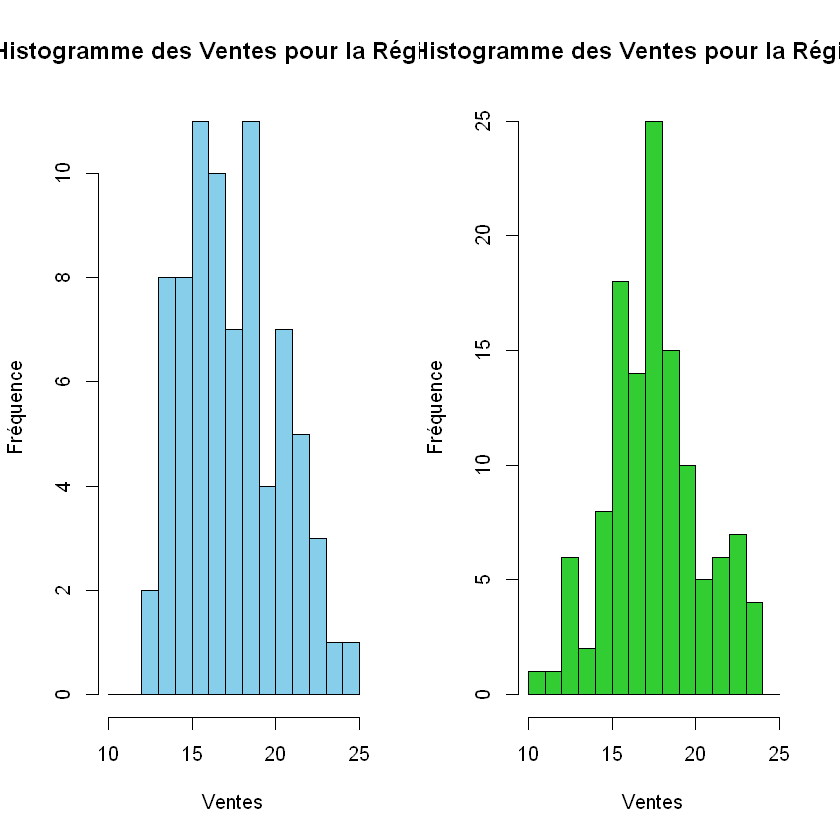

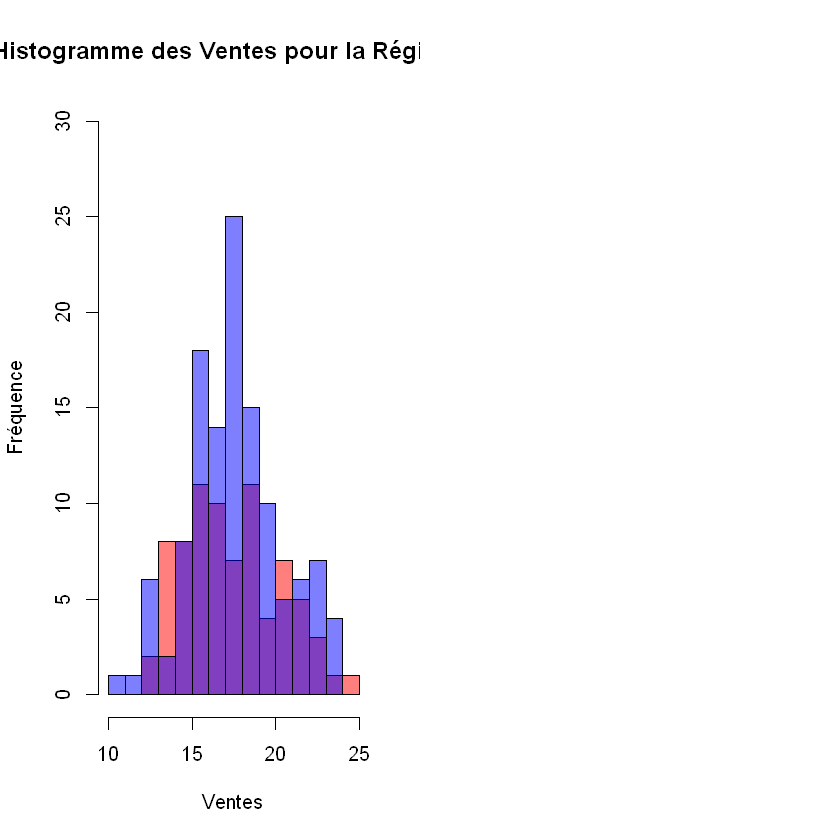

In [ ]:
par(mfrow = c(1, 2))
region0_sales <- subset(data, Region == 0)$Sales
hist(region0_sales, 
     xlim = c(10, 25), 
     breaks = c(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25), 
     main = "Histogramme des Ventes pour la Région 0", 
     xlab = "Ventes", 
     ylab = "Fréquence", 
     col = "skyblue", 
     border = "black")
region1_sales <- subset(data, Region == 1)$Sales
hist(region1_sales, 
     xlim = c(10, 25), 
     breaks = c(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25), 
     main = "Histogramme des Ventes pour la Région 1", 
     xlab = "Ventes", 
     ylab = "Fréquence", 
     col = "limegreen", 
     border = "black")
hist(region0_sales,
    main = "Histogramme des Ventes pour la Région 0",
    breaks = c(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25),
     col = rgb(1, 0, 0, 0.5), 
     xlab = "Ventes",
     ylab = "Fréquence", 
     xlim = c(10, 25),
     ylim = c(0,30))
#
#  Add male histogram
hist(region1_sales, col = rgb(0, 0, 1, 0.5),
breaks = c(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25),
 add = TRUE)


On peut voir ci-dessous que les ventes issues de la région 1 sont plus fréquents que les ventes issues de la région 0.

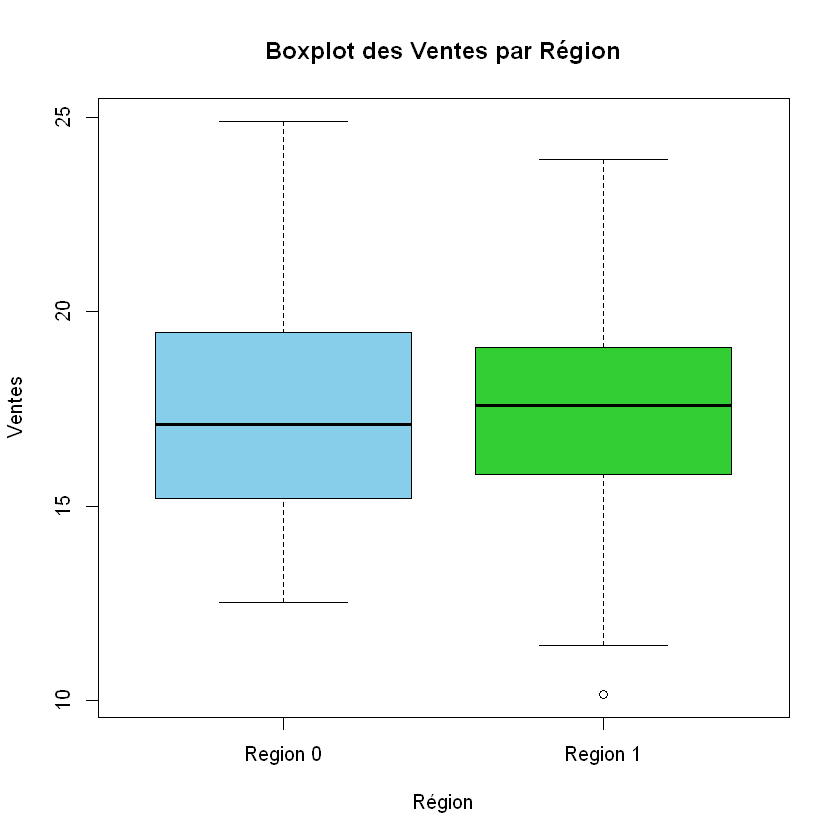

In [ ]:
boxplot(region0_sales,
 region1_sales,
  names = c("Region 0", "Region 1"),
   col = c("skyblue", "limegreen"),
 main = "Boxplot des Ventes par Région",
  ylab = "Ventes",
   xlab = "Région")

La région 0 possède une plus grande valeur maximale que la région 1, tandis que la région 1 possède une plus petite valeur minimale que la région 0. Leurs médiannes semblent être similaire, alors ces boxplots sont comparables. Le IQR de la région 0 est plus grand que celui de la région 1.
La région 0 possède une asymétrie positive, alors ses données sont asymétriques vers la gauche (en bas), tandis que la région 1 possède une asymétrie négative, donc ses données sont asymétrique vers la droite (en haut).
La région 0 possède un boxplot plus grand que le boxplot de la région 1, ce qui indique une plus grande variabilité, tandis que, pour la région 1, cela indique que les données sont un peu plus constantes.
La région 0 possède aussi un plus long whisker, alors ces données sont plus dispersés que la région 1.

In [ ]:
r0moyenne <- mean(region0_sales)
r0variance <- var(region0_sales)
r0q1 <- quantile(region0_sales, 0.25)
r0q2 <- quantile(region0_sales, 0.5)
r0q3 <- quantile(region0_sales, 0.75)
r0ecart_type <- sd(region0_sales)

r0standard_error_mean <- r0ecart_type/sqrt(200)
alpha <- 0.05
degres <- 199
t <- qt(p=alpha/2, df=degres, lower.tail=F)
r0margin_error <- t * r0standard_error_mean
r0lower_bound <- r0moyenne - r0margin_error
r0upper_bound <- r0moyenne + r0margin_error

resultats <- c(r0moyenne, r0variance, r0q1, r0q2, r0q3, r0ecart_type, r0lower_bound, r0upper_bound)
attributs <- c("Moyenne", "Variance", "Q1", "Q2", "Q3", "Ecart-type", "Borne inférieure", "Borne supérieure")
table0 <- as.table(rbind(resultats))
dimnames(table0) <- list(Valeurs = c(""), Attributs = attributs)
table0

       Attributs
Valeurs   Moyenne  Variance        Q1        Q2        Q3 Ecart-type
        17.421154  8.118860 15.225000 17.100000 19.385000   2.849361
       Attributs
Valeurs Borne inférieure Borne supérieure
               17.023844        17.818464

La table ci-dessus nous montre la moyenne, la vairance, les quartiles, l'écart-type et l'intervalle de confiance de la région 0.
Nous pouvons observer que la moyenne (17.421154) et la médianne (17.1) sont proches, suggérant ainsi une disbrution des données de la région 0 plutôt symétrique.
On observe un IQR de 4.16 (Q3 - Q1) et un intervalle de moyenne ± écart-type d'approxivement [14.57, 19.27]. Cela nous montre que la majorité des données sont à l'entour de ces écarts.
Puis, l'intervalle de confiance [17.02, 17.82] montre qu'il y a une forte probabilité que la moyenne réelle des données se situe dans cette intervalle.

In [26]:
r1moyenne <- mean(region1_sales)
r1variance <- var(region1_sales)
r1q1 <- quantile(region1_sales, 0.25)
r1q2 <- quantile(region1_sales, 0.5)
r1q3 <- quantile(region1_sales, 0.75)
r1ecart_type <- sd(region1_sales)

r1standard_error_mean <- r1ecart_type/sqrt(200)
alpha <- 0.05
degres <- 199
t <- qt(p=alpha/2, df=degres, lower.tail=F)
r1margin_error <- t * r1standard_error_mean
r1lower_bound <- r1moyenne - r1margin_error
r1upper_bound <- r1moyenne + r1margin_error

resultats <- c(r1moyenne, r1variance, r1q1, r1q2, r1q3, r1ecart_type, r1lower_bound, r1upper_bound)
attributs <- c("Moyenne", "Variance", "Q1", "Q2", "Q3", "Ecart-type", "Borne inférieure", "Borne supérieure")
table1 <- as.table(rbind(resultats))
dimnames(table1) <- list(Valeurs = c(""), Attributs = attributs)
table1

       Attributs
Valeurs   Moyenne  Variance        Q1        Q2        Q3 Ecart-type
        17.602623  7.864858 15.822500 17.590000 19.062500   2.804435
       Attributs
Valeurs Borne inférieure Borne supérieure
               17.211577        17.993669

La table ci-dessus nous montre la moyenne, la vairance, les quartiles, l'écart-type et l'intervalle de confiance de la région 1.
Nous pouvons observer que la moyenne (17.602623) et la médianne (17.56) sont proches, suggérant ainsi une disbrution des données de la région 1 plutôt symétrique.
On observe un IQR de 3,24 (Q3 - Q1) et un intervalle de moyenne ± écart-type d'approxivement [14.80, 20.41]. Cela nous montre que la majorité des données sont à l'entour de ces écarts.
Puis, l'intervalle de confiance [17.21, 17.99] montre qu'il y a une forte probabilité que la moyenne réelle des données se situe dans cette intervalle.

In [29]:
F_statistic <- r0variance/r1variance
F_statistic
var.test(region0_sales, region1_sales)

[1] 1.032296


	F test to compare two variances

data:  region0_sales and region1_sales
F = 1.0323, num df = 77, denom df = 121, p-value = 0.8656
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6938214 1.5647000
sample estimates:
ratio of variances 
          1.032296 


Tests d'Hypothèse
Hypothèse nulle (H0): σ0^2=σ1^2
​Hypothèse alternative (H1): σ0^2=/=σ1^2

La statistique F nous montre que la variance de la région 0 est légérement supérieure à celle de la région 1 (F_statistic = r0variance/r1variance).
La valeur p de 0.8656 est élevé, ce qui indique qu'on ne devrait pas rejeter l'hypothèse nulle
Avec l'intervalle de confiance de 95% [0.6938, 1.5647], on peut déduire que les variances sont possiblement égales, car 1 est inclut dans l'intervalle.

In [32]:
t.test(region0_sales, region1_sales, var.equal = FALSE)


	Welch Two Sample t-test

data:  region0_sales and region1_sales
t = -0.44201, df = 162.3, p-value = 0.6591
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9921839  0.6292457
sample estimates:
mean of x mean of y 
 17.42115  17.60262 


Tests d'Hypothèse
Hypothèse nulle (H0):μ0^2=𝜇1^2
​Hypothèse alternative (H1): 𝜇0^2=/=𝜇1^2

La statisque t est faible, ce qui montre que les moyennes des deux régions sont proches.
La valeur p est aussi élevé et bien au-dessus du seuil (α=0.05), alors on ne peut pas rejeter l'hypothèse nulle. 
Une intervalle de confiance (95 %) de [−0.9922, 0.6292] inclut la valeur 0, ce qui rend possible que la différence des moyennes soit nulle.

Phase 2 : Recherche d'un meilleur modèle

In [42]:
Y <- sales
X1 <- data$Price
X2 <- data$Age
X3 <- data$Region

#Modele 1 Y =β0+β1X1+ε;
modele1 <- lm(Y ~ X1)
summary(modele1)
anova(modele1)

#Modèle 2 : Y =β0+β1X2+ε
modele2 <- lm(Y ~ X2)
summary(modele2)
anova(modele2)

#Modèle 3 : Y =β0+β1X1^2+ε;
modele3 <- lm(Y ~ I(X1^2))
summary(modele3)
anova(modele3)

#Modèle 4 : Y =β0+β1X2^2 +ε;
modele4 <- lm(Y ~ I(X2^2))
summary(modele4)
anova(modele4)


#Modèle 5 : Y =β0e^(β1X1+ε);
modele5 <- nls(Y ~ (b0*exp(b1*X1)), start = list(b0 = 0, b1 = 0))
summary(modele5)
#annova

#Modèle 6 : Y =β0e^(β1X2+ε);
modele6 <- nls(Y ~ (b0*exp(b1*X2)), start = list(b0 = 0, b1 = 0))
summary(modele6)
#annova

#Modèle 7 : Y =β0X1^β1*e^ε;



Call:
lm(formula = Y ~ X1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5915 -1.9070  0.0733  1.8436  5.6340 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.819254   0.988581   24.09  < 2e-16 ***
X1          -0.053775   0.008312   -6.47 7.53e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.565 on 198 degrees of freedom
Multiple R-squared:  0.1745,	Adjusted R-squared:  0.1703 
F-statistic: 41.86 on 1 and 198 DF,  p-value: 7.526e-10


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,275.4498,275.449842,41.85921,7.526319e-10
Residuals,198,1302.9170,6.580389,NA,NA



Call:
lm(formula = Y ~ X2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7671 -1.8342 -0.2574  1.7464  7.3739 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.92998    0.66259  30.079  < 2e-16 ***
X2          -0.04452    0.01177  -3.783 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.727 on 198 degrees of freedom
Multiple R-squared:  0.06741,	Adjusted R-squared:  0.0627 
F-statistic: 14.31 on 1 and 198 DF,  p-value: 0.0002052


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X2,1,106.3937,106.393695,14.31137,0.0002051672
Residuals,198,1471.9731,7.434208,NA,NA



Call:
lm(formula = Y ~ I(X1^2))

Residuals:
   Min     1Q Median     3Q    Max 
-6.667 -1.966  0.044  1.911  5.708 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.070e+01  5.405e-01  38.288  < 2e-16 ***
I(X1^2)     -2.236e-04  3.596e-05  -6.218 2.93e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.582 on 198 degrees of freedom
Multiple R-squared:  0.1634,	Adjusted R-squared:  0.1591 
F-statistic: 38.66 on 1 and 198 DF,  p-value: 2.932e-09


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
I(X1^2),1,257.8472,257.847176,38.66186,2.931876e-09
Residuals,198,1320.5196,6.669291,NA,NA



Call:
lm(formula = Y ~ I(X2^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6551 -1.8718 -0.2916  1.7066  7.2627 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.8455960  0.3998071  47.137  < 2e-16 ***
I(X2^2)     -0.0004144  0.0001105  -3.752 0.000231 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.728 on 198 degrees of freedom
Multiple R-squared:  0.06636,	Adjusted R-squared:  0.06165 
F-statistic: 14.07 on 1 and 198 DF,  p-value: 0.0002308


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
I(X2^2),1,104.7456,104.745650,14.07393,0.0002307925
Residuals,198,1473.6212,7.442531,NA,NA


ERROR: Error in nlsModel(formula, mf, start, wts, scaleOffset = scOff, nDcentral = nDcntr): singular gradient matrix at initial parameter estimates
